# Campus Analysis 
This data set consists of Placement data of students in a XYZ campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students:


## Features:
1. sl_no:Serial Number
2. gender:Male=M,Female=F
3. ssc_p:Secondary Education percentage- 10th Grade
4. ssc_b:Board of Education- Central/ Others
5. hsc_p:Higher Secondary Education percentage- 12th Grade
6. hsc_b:Board of Education- Central/ Others
7. hsc_s:Specialization in Higher Secondary Education
8. degree_p:Degree Percentage',
9. degree_t:Under Graduation(Degree type)- Field of degree education
10. workex:Work Experience
11. etest_p: Employability test percentage ( conducted by college)
12. specialisation Post Graduation(MBA)- Specialization
13. mba_p: MBA percentage
14. status: Status of placement- Placed/Not placed
15. salary: Salary offered by corporate to candidates

In [1]:
# for data manipulation and visulasation 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# for statitiscial analysis 
from scipy import stats 
from scipy.stats import ttest_1samp,shapiro,levene,ttest_ind,mannwhitneyu,pearsonr,spearmanr,kendalltau,f_oneway,kruskal
from scipy.stats import chi2_contingency 

# modeling
from sklearn.linear_model import LogisticRegression
# Model Evaluations
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,RocCurveDisplay

# to divide train and test set 
from sklearn.model_selection import train_test_split

# categorical encoding
from feature_engine.encoding import PRatioEncoder

# feature scaling 
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# to display all the columns of the dataframe in the notebook 
pd.pandas.set_option('display.max_columns',None)

In [2]:
# Load data 
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### Data Analysis 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
# get some statistics 
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


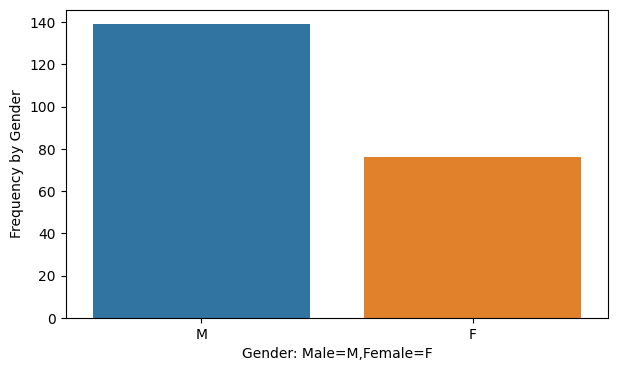

In [5]:
# lets check the frequcny of gender 
plt.figure(figsize=(7,4))
sns.countplot(x='gender',data=df);
plt.xlabel('Gender: Male=M,Female=F')
plt.ylabel('Frequency by Gender')
plt.show();


Most of the students who got placement are males.

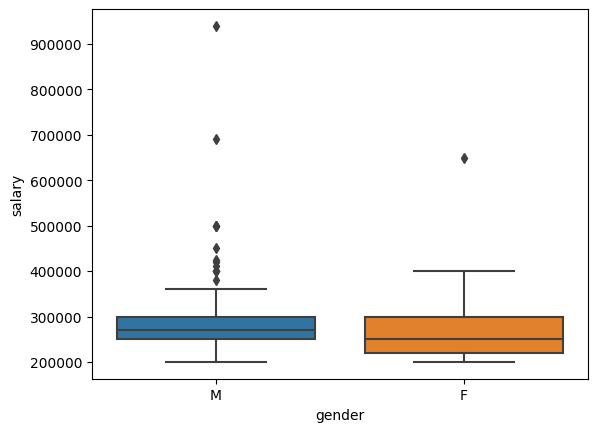

In [6]:
sns.boxplot(x='gender',y='salary',data=df);

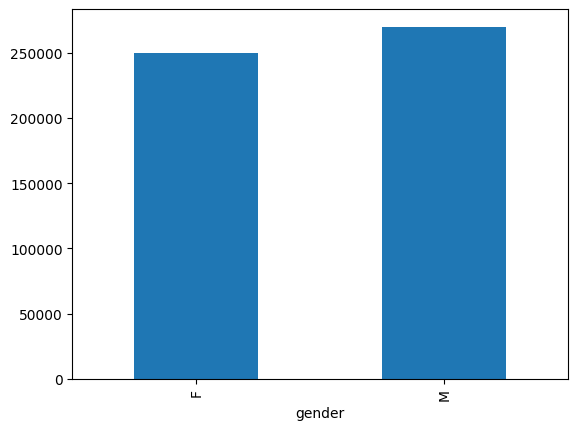

In [7]:
df.groupby('gender').median()['salary'].plot.bar();

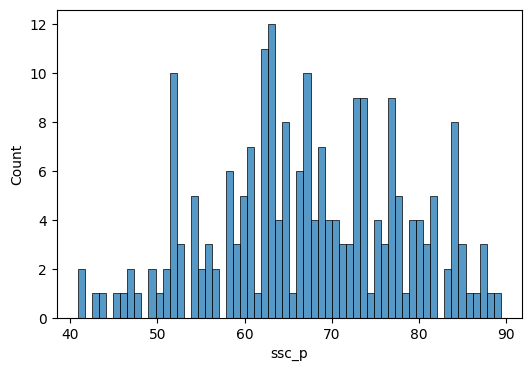

In [8]:
# Lets check Secondary Education percentage- 10th Grade distribution 
plt.figure(figsize=(6,4))
sns.histplot(data =df,x='ssc_p',bins=60);

In [9]:
df.ssc_p.value_counts().head(10) 

62.0    11
63.0    10
67.0     9
52.0     9
73.0     9
74.0     7
65.0     7
69.0     7
77.0     6
58.0     6
Name: ssc_p, dtype: int64

We can see that the most  frequent Secondary Education percentage of the 10th Grade is 62%


##### Board of Education- Central/ Others

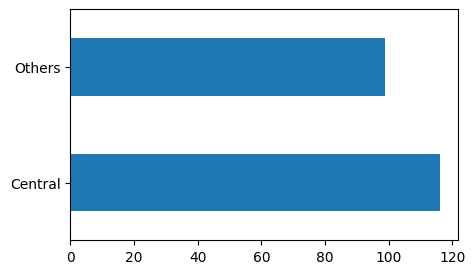

In [10]:
plt.figure(figsize=(5,3))
df.ssc_b.value_counts().plot(kind='barh');

Most board of education for the Secondary Education of  10th Grade is central

<AxesSubplot:xlabel='ssc_b', ylabel='ssc_p'>

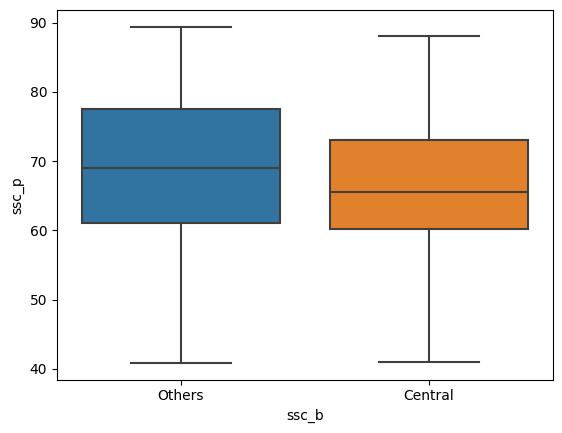

In [11]:
# lets plot boxplot to compare the average percentage of the seconday education of the 10th grade for board of education
sns.boxplot(x='ssc_b',y='ssc_p',data=df)

Even though the most frequent board of the education for the secondary school of the 10th garde is central, 
students from others board of education got higher secondary school 10th grade percentage score on average than central.

In [12]:
df.hsc_p.value_counts()

63.00    14
62.00    12
67.00     9
60.00     9
64.00     8
         ..
83.83     1
70.40     1
90.90     1
89.83     1
42.00     1
Name: hsc_p, Length: 97, dtype: int64

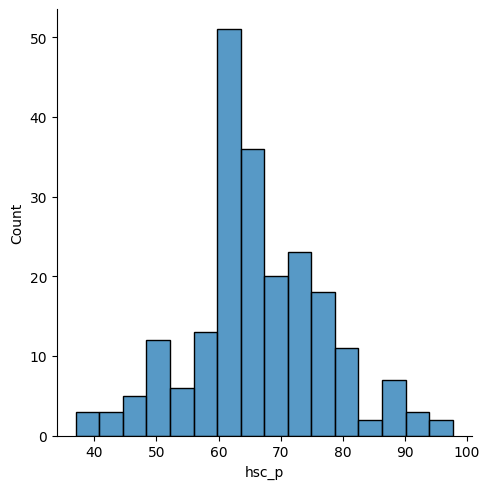

In [13]:
sns.displot(data=df,x='hsc_p')

We can see that the most frequent percentage for 12 graders is between 62-63%

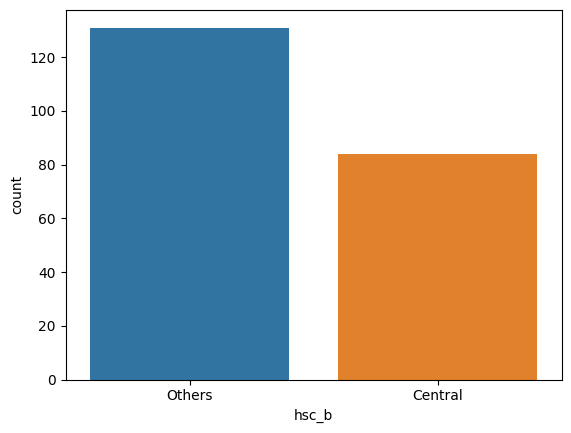

In [14]:
sns.countplot(x='hsc_b',data=df);

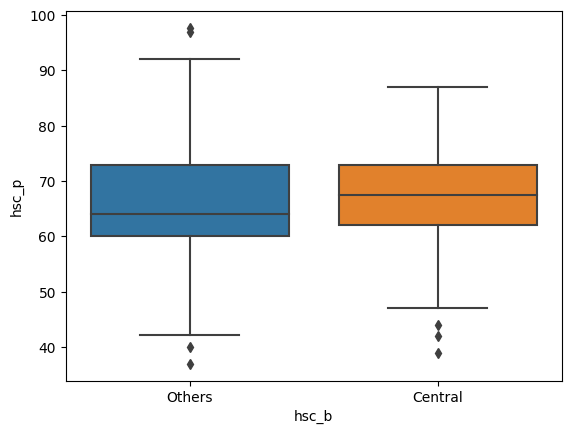

In [15]:
sns.boxplot(x='hsc_b',y='hsc_p',data=df);

Even though the most frequent board of the education for the secondary school of the 12th grade is others, 
central is bigger that central on average for the school percentage of 12th grade. 

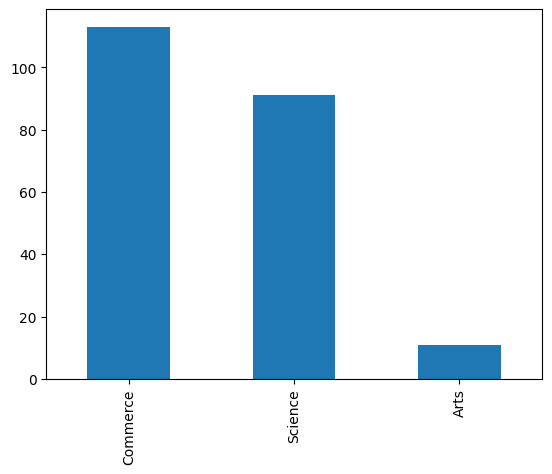

In [16]:
df['hsc_s'].value_counts().plot.bar();

Most students who Specialize in Higher Secondary Education come from commerce 

In [17]:
df['degree_p'].value_counts()

65.0    20
66.0    13
72.0    12
64.0    11
58.0     9
        ..
82.0     1
50.8     1
76.0     1
63.0     1
77.6     1
Name: degree_p, Length: 89, dtype: int64

We can see that the most frequent degree percentage is 65% 

In [18]:
def plot(df,var):
    df=df.copy()
    plt.figure(figsize=(5,4))
    sns.boxplot(x=var,y='degree_p',data=df)
    plt.ylabel('Degree Percentage by ' + var)
    plt.show()

In [19]:
cat_var = [x for x in df.columns if df[x].dtype=='O']

In [20]:
cat_vars = ['gender',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']


In [21]:
cat_vars

['gender', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

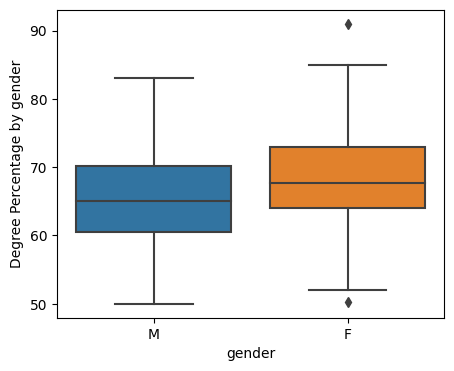

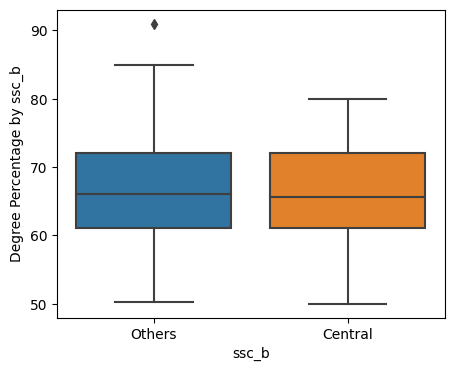

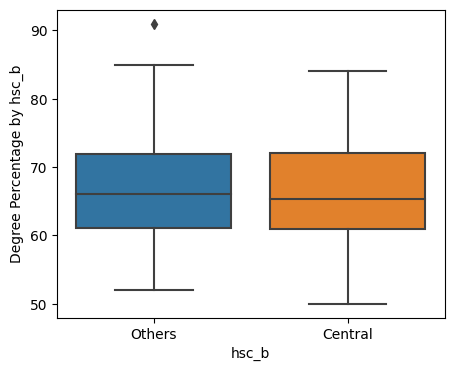

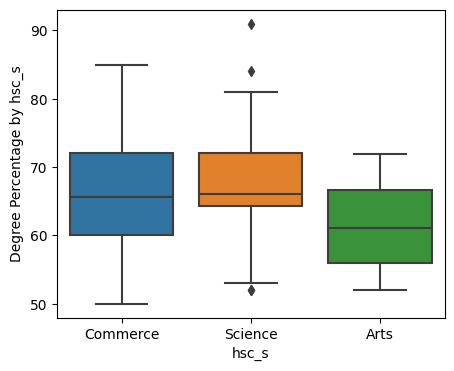

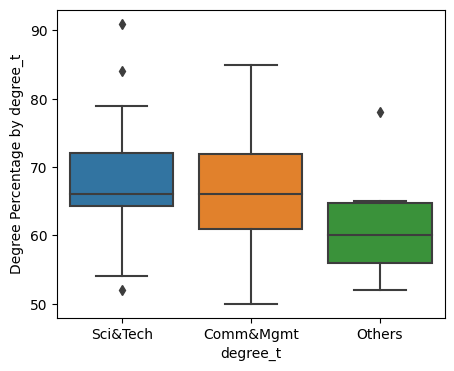

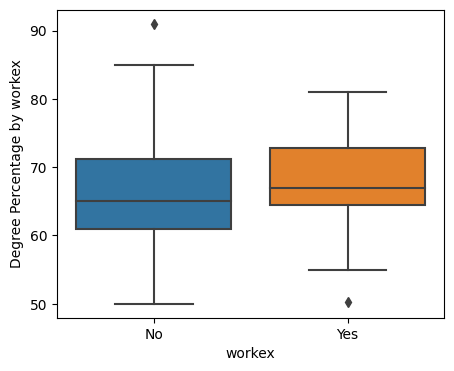

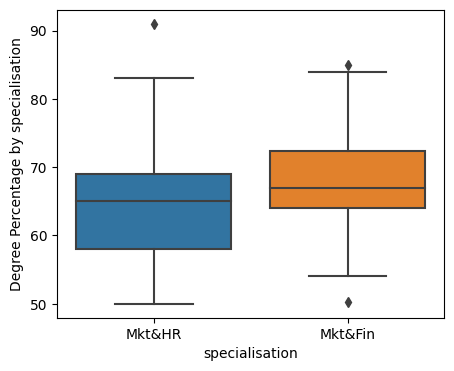

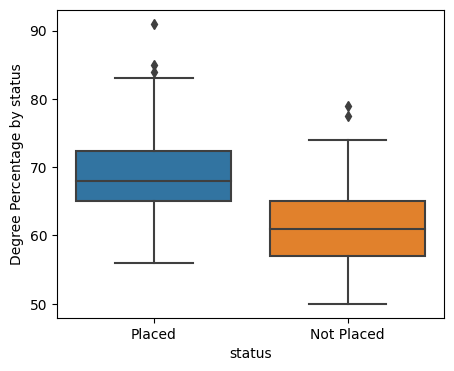

In [22]:
for var in cat_var:
    plot(df,var)
    

We can see that the minimum and maximum degree percentage score of the two gender is female 
and we can see that on average the female degree percentage is higher than the male

In [23]:
def plot_m(df,x):
    df=df.copy()
    df.groupby(x)['degree_p'].mean().plot.bar()
    plt.ylabel('Degree Percentage ' + x)
    plt.show()

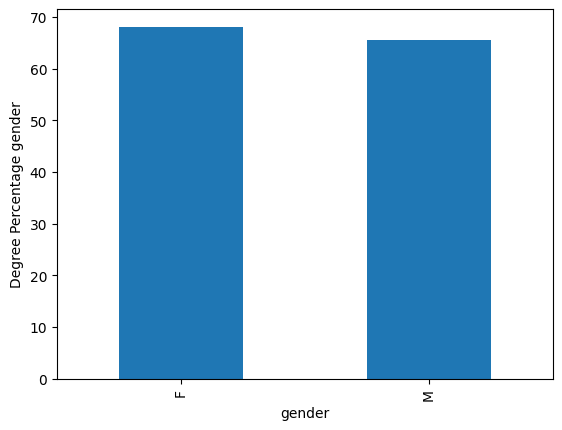

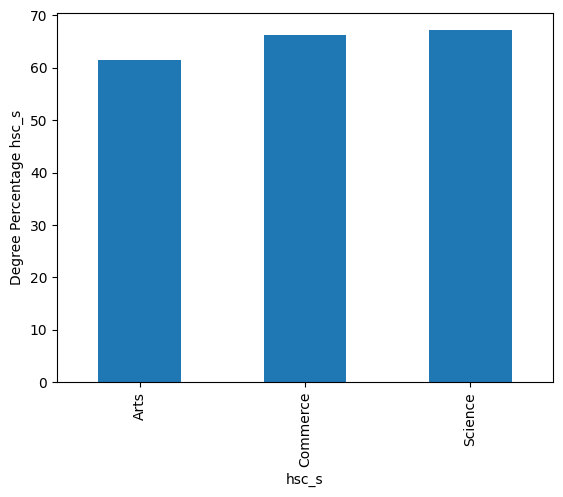

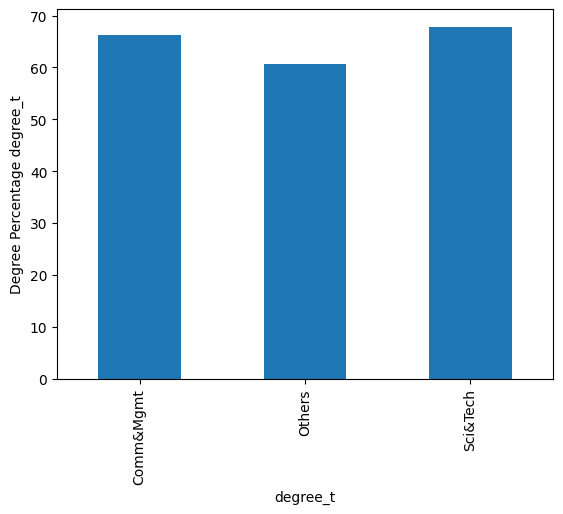

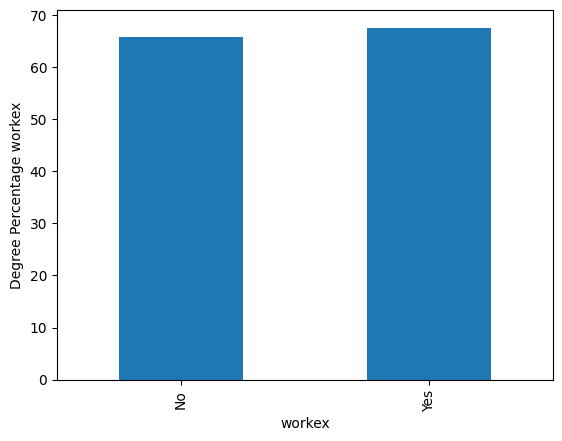

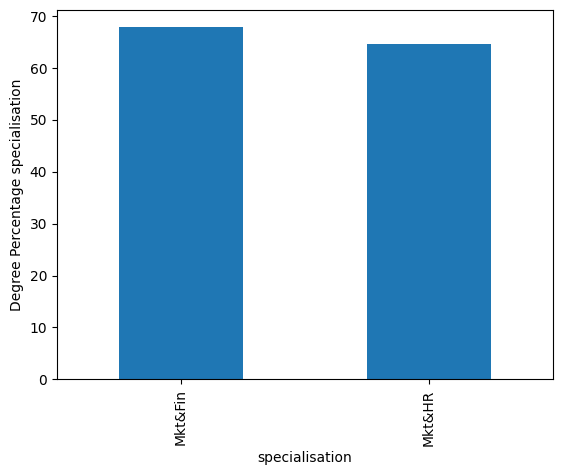

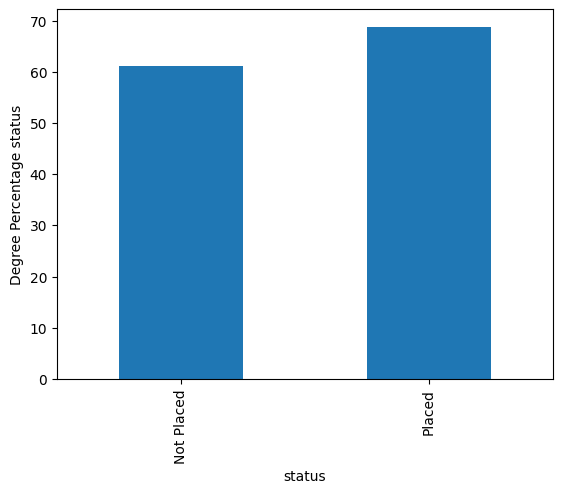

In [24]:
for y in cat_vars:
    plot_m(df,y)

In [25]:
df.groupby('hsc_s')['degree_p'].mean()

hsc_s
Arts        61.475455
Commerce    66.211681
Science     67.158681
Name: degree_p, dtype: float64

The highest degree percentage for specialization in higher secondary education on average is science

In [26]:
df.groupby('degree_t')['degree_p'].mean()

degree_t
Comm&Mgmt    66.203103
Others       60.666364
Sci&Tech     67.844237
Name: degree_p, dtype: float64

The highest degree for  Field of degree education on average is sci&Tech

Students who had work experience scored higher degree percentage on average

In [27]:
df.groupby('status')['degree_p'].mean()

status
Not Placed    61.134179
Placed        68.740541
Name: degree_p, dtype: float64

The average degree percentage of the students who got a placemet is 68.7% .

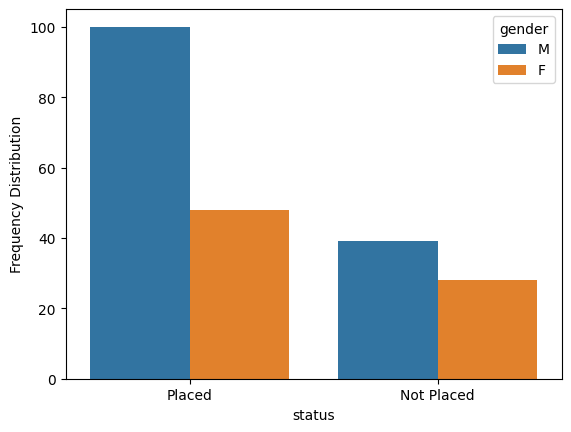

In [28]:
sns.countplot(x='status',hue='gender',data=df)
plt.ylabel('Frequency Distribution');

##### Status and degree percentage

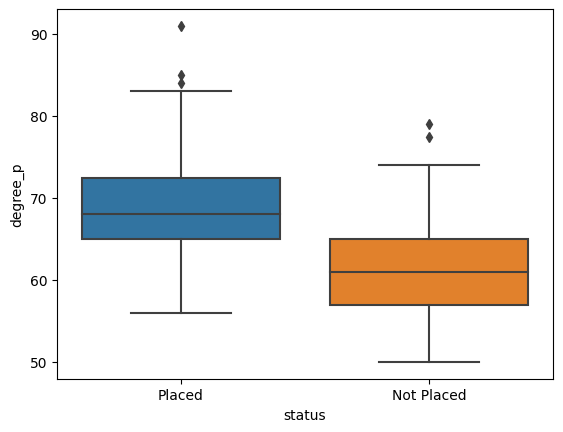

In [29]:
sns.boxplot(x='status',y='degree_p',data=df);

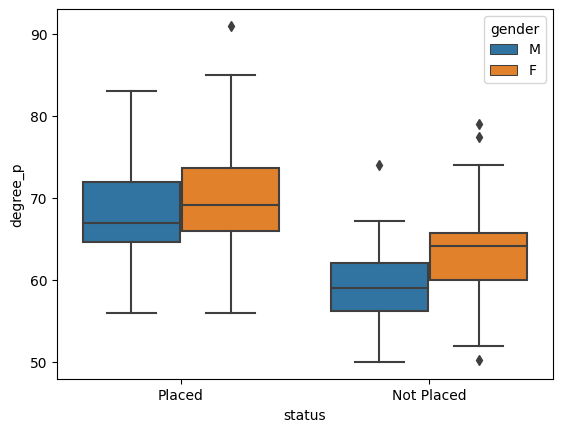

In [30]:
sns.boxplot(x='status',y='degree_p',hue='gender',data=df);

Out of the students who got placed - females got the higher degree percentage. Probably the degree percentage has some effect on the offer we will do statistical analysis 
to confirm that. 

##### Degree type and status

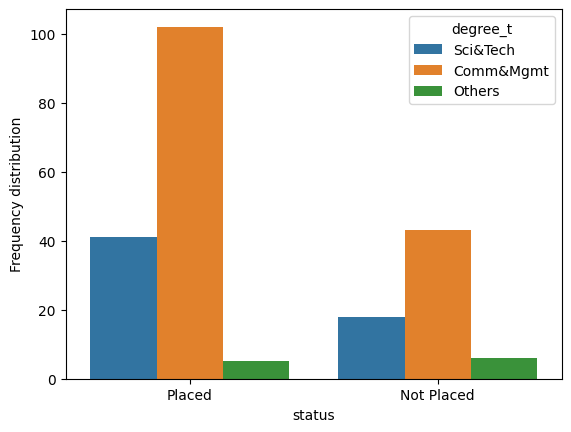

In [31]:
sns.countplot(x='status',data=df,hue='degree_t')
plt.ylabel('Frequency distribution')
plt.show()

The most frequent students who got placed come from comm&Mgmtt undergraduate degree.

##### Work experience vs status

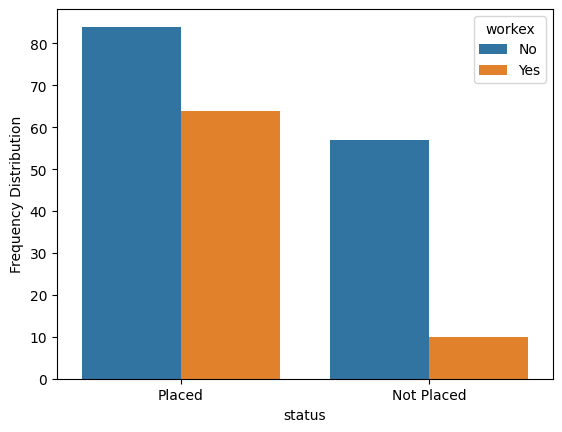

In [32]:
sns.countplot(x='status',data=df,hue='workex')
plt.ylabel('Frequency Distribution')
plt.show()

Students who has got no work experience has gotten placed more than the students who has work experience. 

##### Specialisation

In [33]:
round(df['specialisation'].value_counts()/len(df)*100,0)

Mkt&Fin    56.0
Mkt&HR     44.0
Name: specialisation, dtype: float64

56% of the MBA specialist are in marketing and finance. 44% are from marketing and HR.

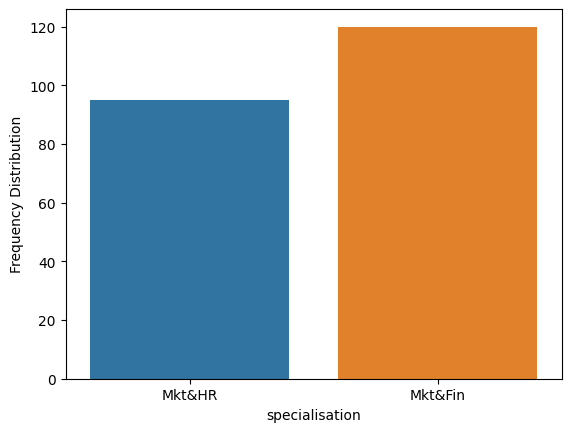

In [34]:
sns.countplot(x='specialisation',data=df);
plt.ylabel('Frequency Distribution')
plt.show()

##### Specialisation vs Status

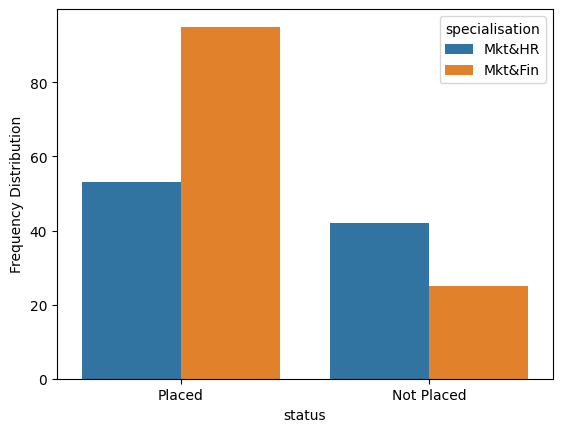

In [35]:
sns.countplot(x='status',data=df,hue='specialisation')
plt.ylabel('Frequency Distribution')
plt.show()

Students with specialization MBA in marketing and finance got placed the most than others. 

##### Employability test percentage vs Gender

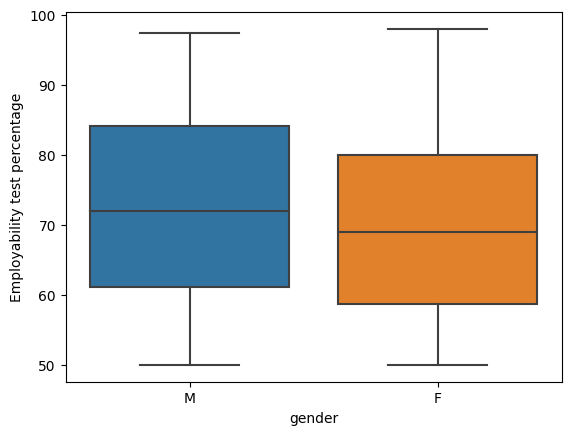

In [36]:
sns.boxplot(x='gender',y='etest_p',data=df)
plt.ylabel('Employability test percentage')
plt.show()

Male students have higher employability test percentage on average than females.

##### Employability test percentage vs Status

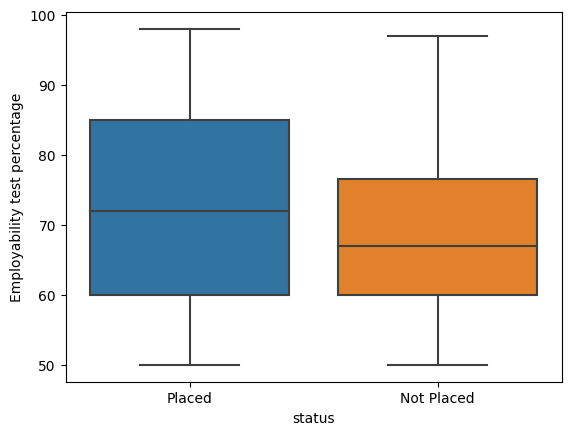

In [37]:
sns.boxplot(x='status',y='etest_p',data=df)
plt.ylabel('Employability test percentage')
plt.show()

Students with higher employability test percentages are placed 

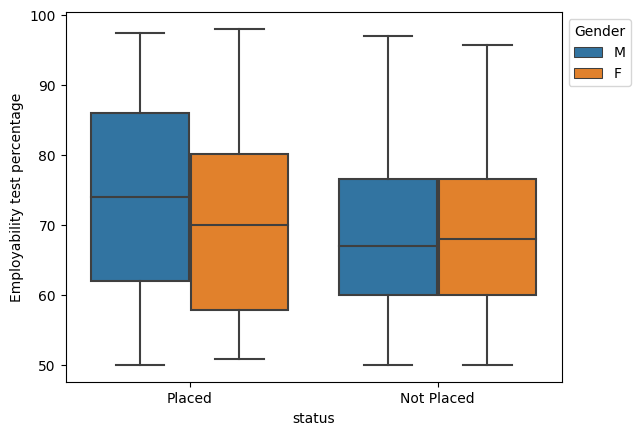

In [38]:
sns.boxplot(x='status',y='etest_p',hue='gender',data=df)
plt.ylabel('Employability test percentage')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1),title='Gender'); 
plt.show()

Out of all the students who got placement, male students had scored the highest employability test percentage on average than female students. 

##### Gender vs workex

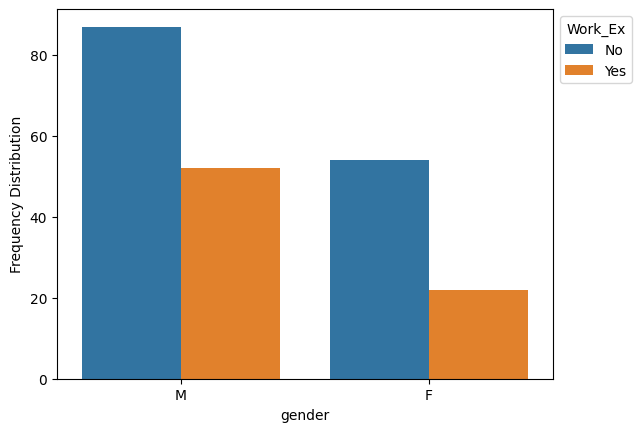

In [39]:
sns.countplot(x='gender',data=df,hue='workex')
plt.ylabel('Frequency Distribution')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1),title='Work_Ex'); 
plt.show() 

##### Gender and mba_p (MBA percentage)

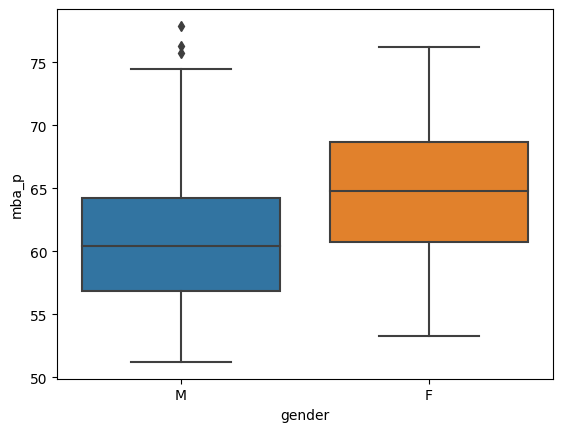

In [40]:
sns.boxplot(x='gender',y='mba_p',data=df);

We can see that female students had scored on average higher mba percentage than male students. 

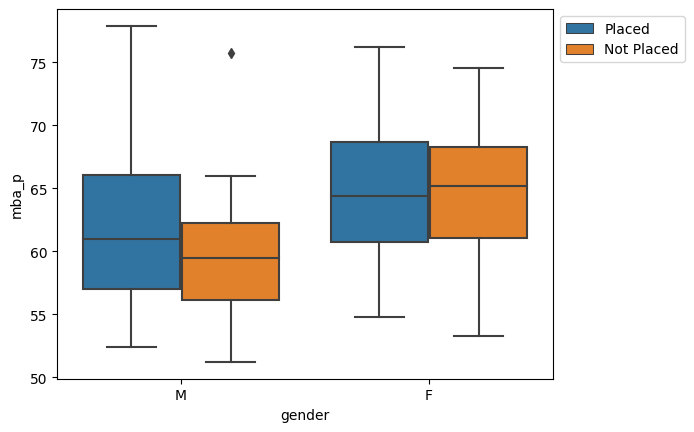

In [41]:
sns.boxplot(x='gender',y='mba_p',hue='status',data=df);
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)); 
plt.show();

##### Specialisation and mba_p

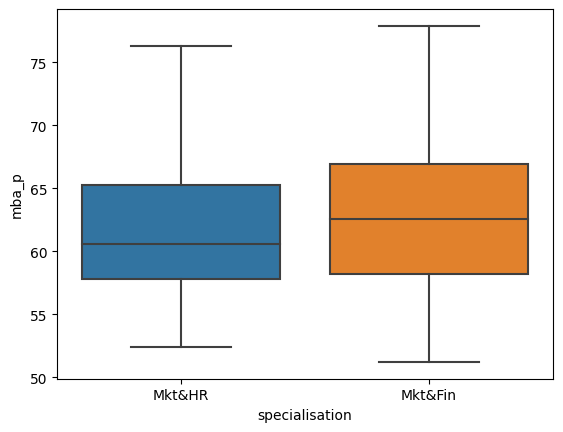

In [42]:
sns.boxplot(x='specialisation',y='mba_p',data=df)
plt.show()

MBA Students who specialized in marketing and finance scored on average higher mba percentage than those of students who specialized in marketing and HR. 

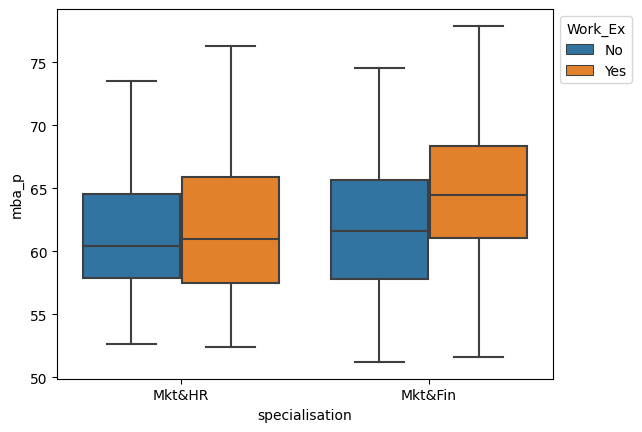

In [43]:
sns.boxplot(x='specialisation',y='mba_p',hue='workex',data=df)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1),title='Work_Ex'); 
plt.show();

Within those MBA Students who specialized in marketing and finance that scored higher MBA percentage had also work experience.

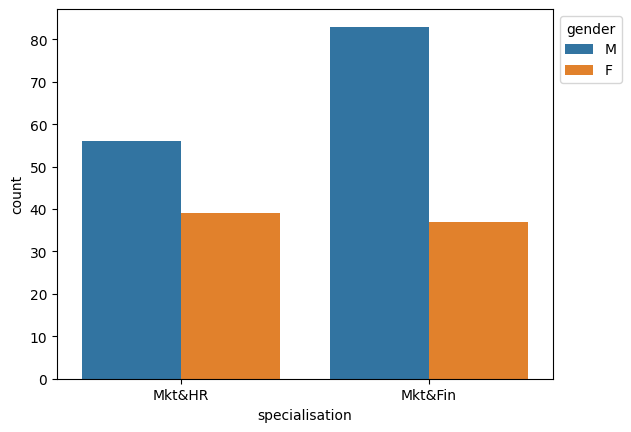

In [44]:
sns.countplot(x='specialisation',hue='gender',data=df)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1),title='gender'); 
plt.show()


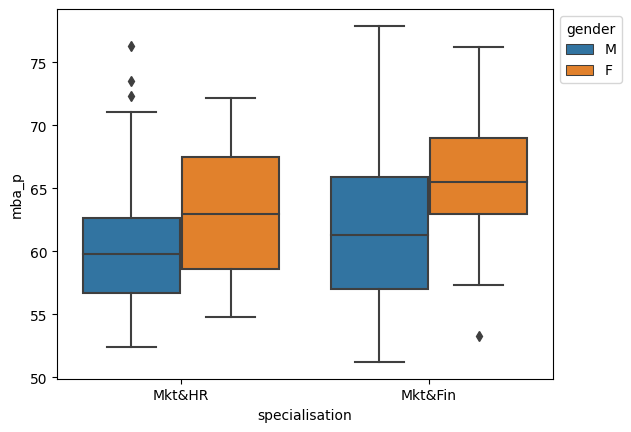

In [45]:
sns.boxplot(x='specialisation',y='mba_p',hue='gender',data=df)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1),title='gender'); 
plt.show()


Females scored higher on average on both of the post graduation mba specialisation.

##### Status and mba_p

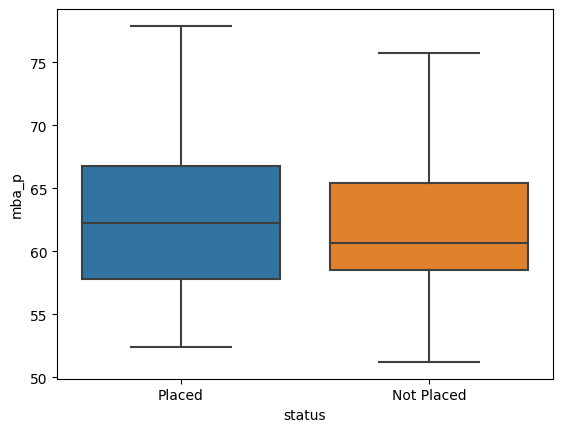

In [46]:
sns.boxplot(x='status',y='mba_p',data=df)
plt.show()


Students with higher MBA percentages got placed. 

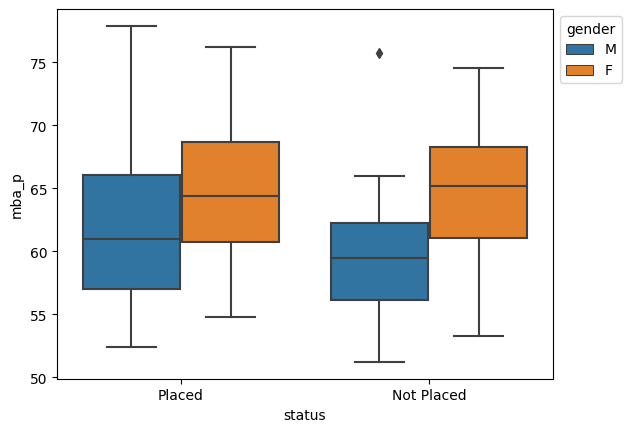

In [47]:
sns.boxplot(x='status',y='mba_p',hue='gender',data=df)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1),title='gender'); 
plt.show()


Of those students who got placed and scored higher MBA percentages are females.

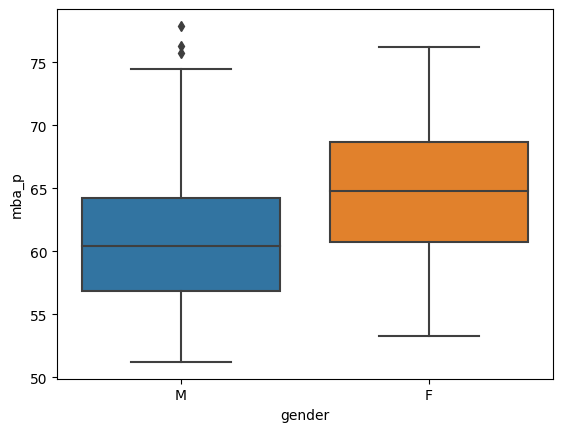

In [48]:
sns.boxplot(x='gender',y='mba_p',data=df);

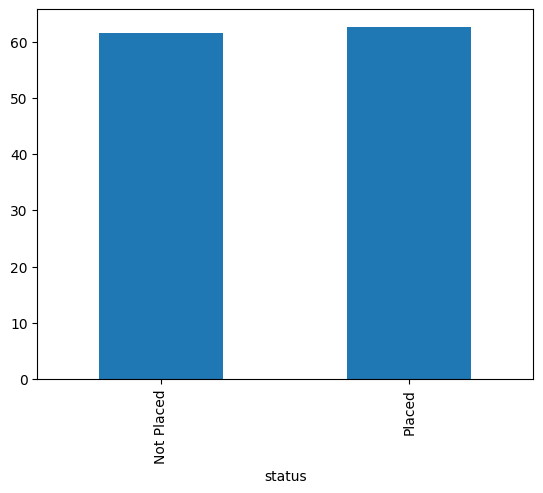

In [49]:
df.groupby('status')['mba_p'].mean().plot.bar() ;

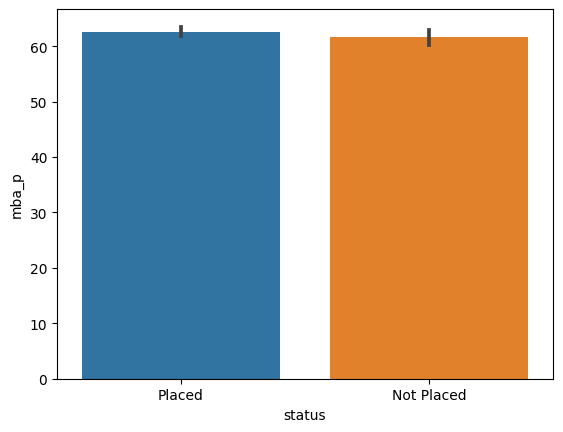

In [50]:
sns.barplot(x='status',y='mba_p',data=df);

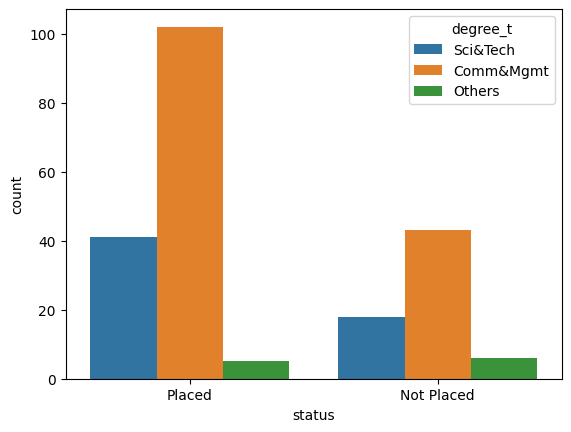

In [51]:
sns.countplot(x='status',hue='degree_t',data=df);

Students who come from comm&Mgmt undergraduate degree got placement the most 

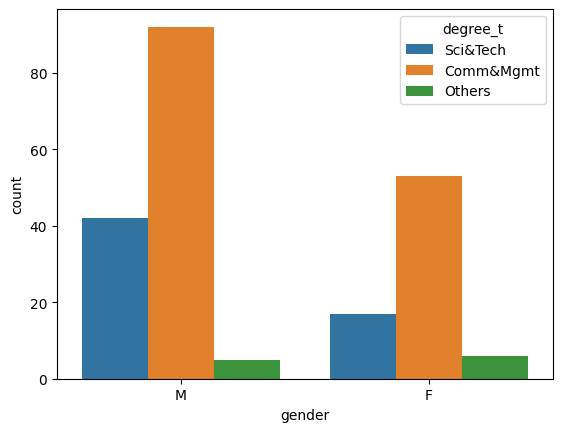

In [52]:
sns.countplot(x='gender',hue='degree_t',data=df);

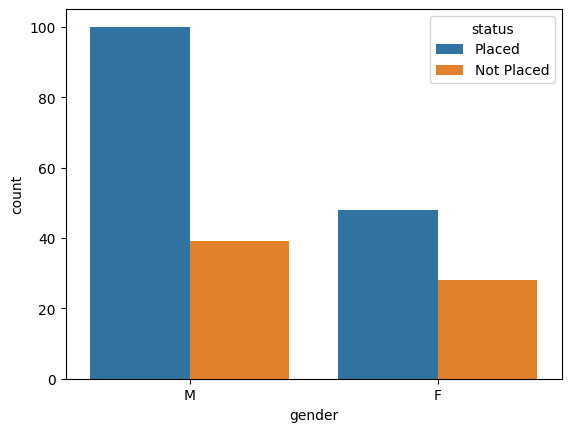

In [53]:
sns.countplot(x='gender',hue='status',data=df);

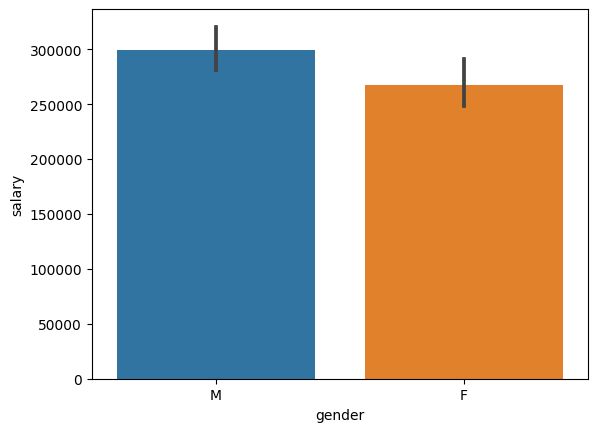

In [54]:
sns.barplot(x='gender',y='salary',data=df);

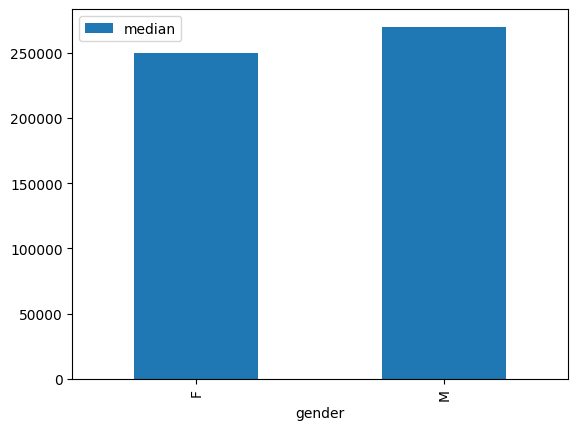

In [55]:
df.groupby('gender')['salary'].agg(['median']).plot.bar();

##### Undergraduate degree type and Salary 

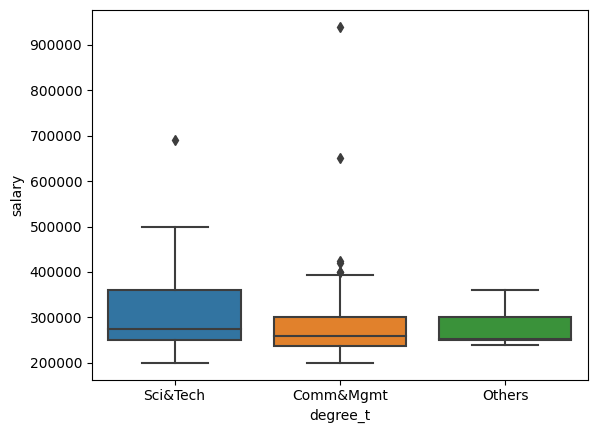

In [56]:
sns.boxplot(x='degree_t',y='salary',data=df);

The students whose undergraduate degree were from Science and technology had the highest salary offered on average. 

##### Undergraduate Post Graduation(MBA)- Specialization  and Salary 

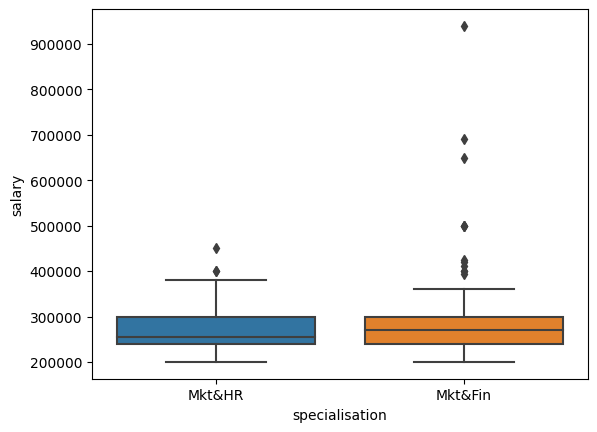

In [57]:
sns.boxplot(x='specialisation',y='salary',data=df);

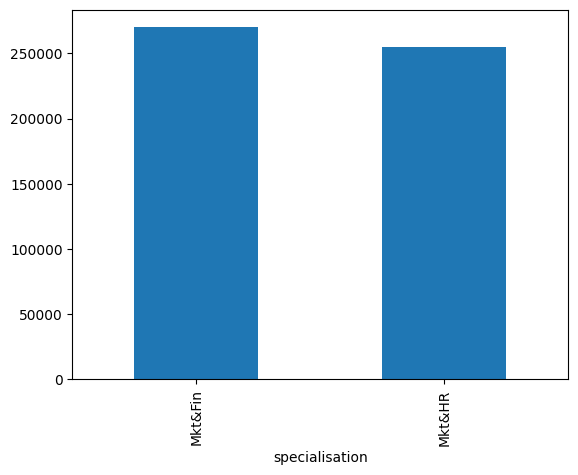

In [58]:
df.groupby('specialisation')['salary'].median().plot.bar();

The students who have Marketing and Finance MBA degree have higher salary on average than those studnets who have marketing and HR MBA.

##### Work experience and Salary 

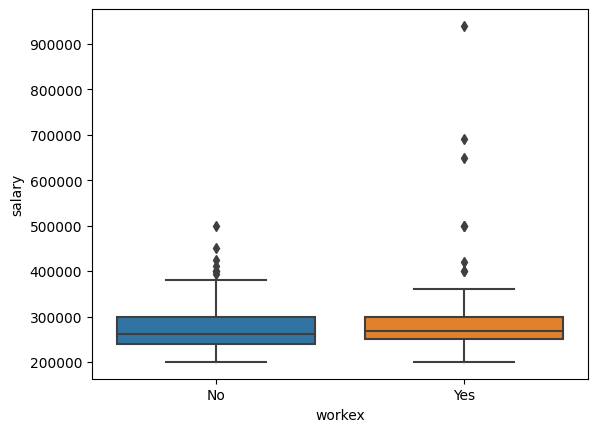

In [59]:
sns.boxplot(x='workex',y='salary',data=df);

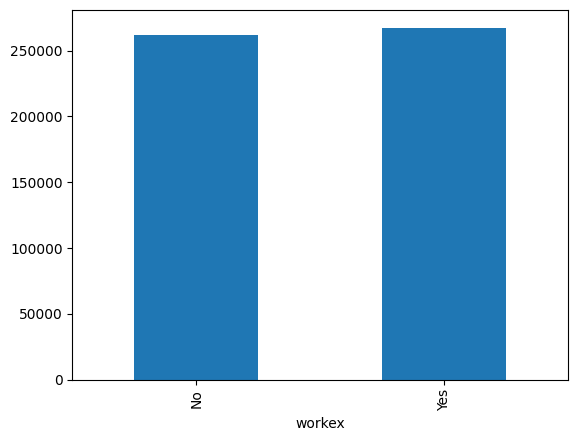

In [60]:
df.groupby('workex')['salary'].median().plot.bar();

The students who had a work experience have higher salary on average than those students who had no work expereince. 

##### Work experience and employability test percentage

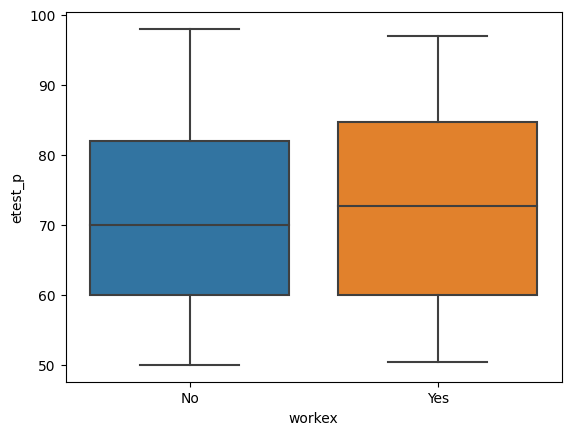

In [61]:
sns.boxplot(x='workex',y='etest_p',data=df);

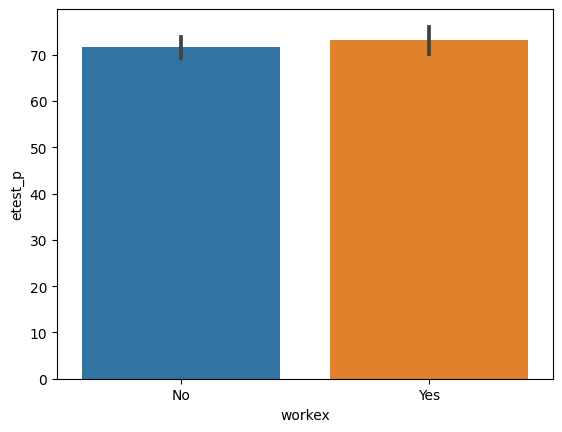

In [62]:
sns.barplot(x='workex',y='etest_p',data=df);

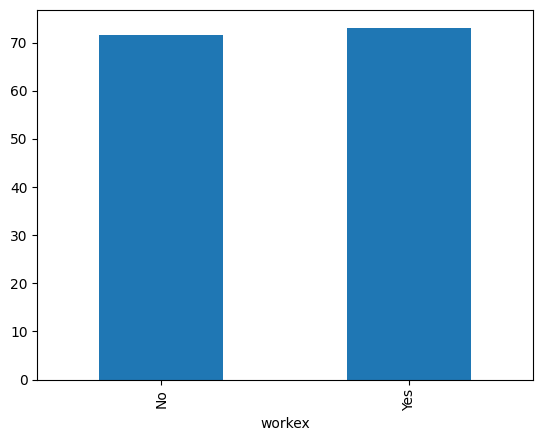

In [63]:
df.groupby('workex')['etest_p'].mean().plot.bar();

The Students who had work experience had also higher employability test percentage on average.

### Statistical Tests 

In [64]:
df['Total_percentage'] = round(df.drop(['sl_no','salary'],axis=1).sum(axis=1)/5)

C:\Users\hi\AppData\Local\Temp\ipykernel_22172\401728563.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total_percentage'] = round(df.drop(['sl_no','salary'],axis=1).sum(axis=1)/5)


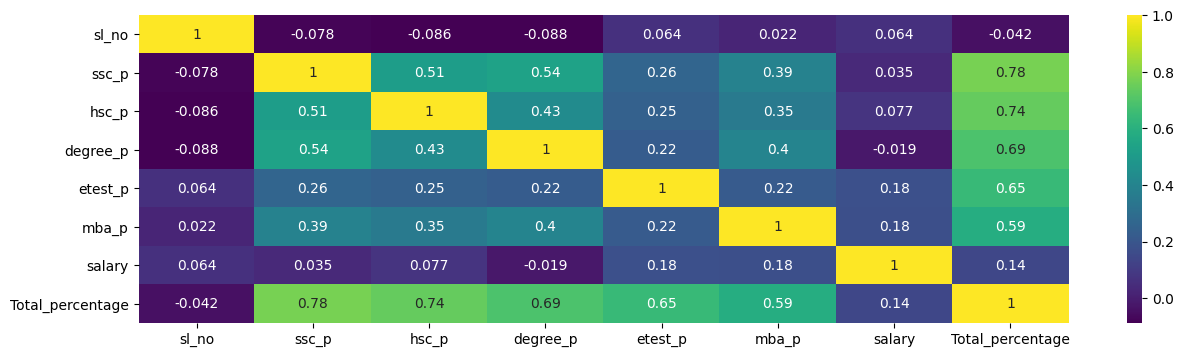

In [65]:
# correlations among variables
plt.figure(figsize=(15,4))
sns.heatmap(df.corr(),cmap='viridis',annot=True);

There is a positive correlation between all  the percentage some are strong and some are moderate 

##### Is there a correlation between work expereince and Employability test percentage?
##### Point Biserial Correlation 


In [66]:
#H0: There is no statistically significant corrleation between work expereince and employability test percentage
#H1: There is statistically significant correlation between work expereince and employability test percentage

In [67]:
df['workex'] = np.where(df['workex']=='Yes',1,0)
etest_p=df['etest_p']
from scipy import stats
corr,p_value = stats.pointbiserialr(df['workex'],etest_p)
if p_value<=0.05:
    print('Reject H0')
else:
    print('Accept H1')

Accept H1


We accept our alternative hypothesis that there is a correlation between work experience and employability test percentage. 

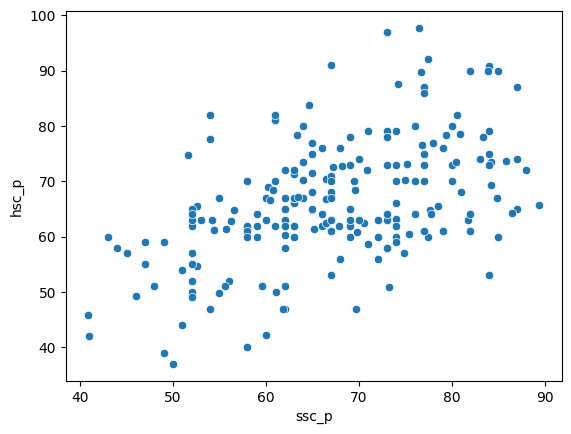

In [68]:
# a relatsionship between the 10th and 12 grade percentage 
sns.scatterplot(x='ssc_p',y='hsc_p',data=df);

There is a positive correlation between 10th garde percentage and 12 grade percentage. As score on one variable goes up on average 
the scroe on the second variable goes up as well. Students who score high on 10th grade tend to score high in the 12th grade too.  

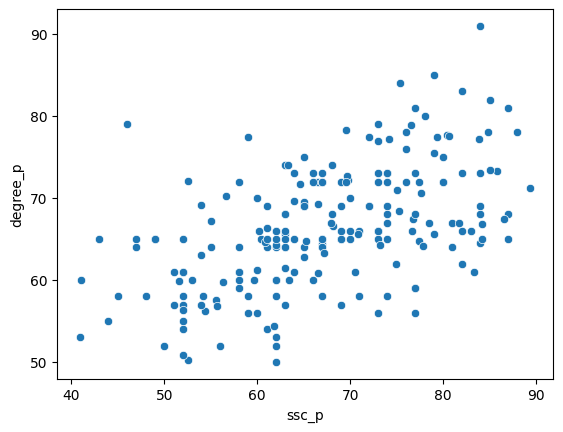

In [69]:
sns.scatterplot(x='ssc_p',y='degree_p',data=df);

There is a positive correlation between 10th garde percentage and degree percentage. As score on one varibalee goes up on average 
the scroe on the second variable goes up as well. 

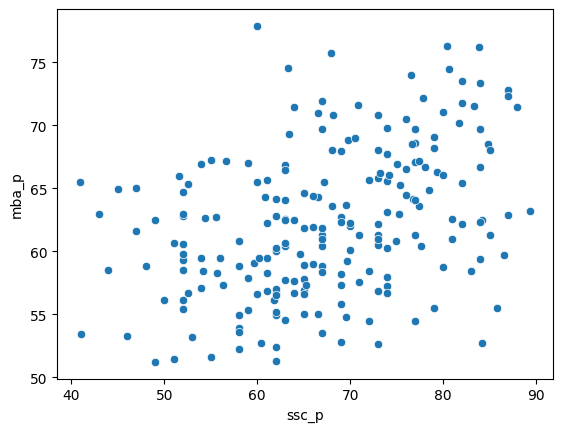

In [70]:
sns.scatterplot(x='ssc_p',y='mba_p',data=df);

There is a moderate positive correlation between 10th grade percentage and mba percentage.

##### Does percentage matter for one to get placed?

In [71]:
# Lets check the assumption for independent sample t test 
# Hypothesize to check normality
# H0: Normal distribution assumption is provided.
# H1:..not provided.
test_stat, pvalue = shapiro(df.loc[df["status"] == "Placed", "Total_percentage"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
if pvalue<=0.05:
    print('Reject H0:normal distribution is not provided ')
else:
    print('Accept H0: normal distribution is provided')

Test Stat = 0.9695, p-value = 0.0023
Reject H0:normal distribution is not provided 


In [72]:
# Lets check the assumption for independent sample t test 
# Hypothesize to check normality
# H0: Normal distribution assumption is provided.
# H1:..not provided.
test_stat, pvalue = shapiro(df.loc[df["status"] == "Not Placed", "Total_percentage"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
if pvalue<=0.05:
    print('Reject H0:normal distribution is not provided ')
else:
    print('Accept H0: normal distribution is  provided')

Test Stat = 0.9722, p-value = 0.1390
Accept H0: normal distribution is  provided


Let’s continue with the assumption checks and check the second assumption, the homogeneity of variance assumption.
**“Levene test” is used when making the assumption of homogeneity of variance.**

In [73]:
# And now let’s hypothesize for variance homogeneity
# H0: Variances are Homogeneous
# H1: Variances are Not Homogeneous

test_stat, pvalue = levene(df.loc[df["status"] == "Placed", "Total_percentage"],
                           df.loc[df["status"] == "Not Placed", "Total_percentage"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
if pvalue<=0.05:
    print('Reject H0:Variances are not Homogeneous')
else:
    print('Accept H0:Variances are Homogeneous')

Test Stat = 1.7585, p-value = 0.1862
Accept H0:Variances are Homogeneous


**Since normality cannot be achieved, we should do a non-parametric test. (Mann Whitney u test)**



In [74]:
# # 1.2 Mannwhitneyu test if assumptions are not provided 
# (non-parametric test)

test_stat, pvalue = mannwhitneyu(df.loc[df["status"] == "Placed", "Total_percentage"],
                                 df.loc[df["status"] == "Not Placed", "Total_percentage"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
if pvalue<=0.05:
    print('Reject H0')
    print('Statistically significant')
else:
    print('Accept H0')
    print('Not Statistically significant')


Test Stat = 1663.0000, p-value = 0.0000
Reject H0
Statistically significant


Since our results are statistically significant the percentages do matter for one to get placed.

We reject our null hypothesis that percentages do not matter for one to get placed and accept our alternative hypothesis that percentages do matter. 

#### Chi-squared Test 
##### Is there an association between specialisation( Post graduation MBA) and status?

In [75]:
c = pd.crosstab(df['specialisation'], df['status'])

In [76]:
stat, p, dof, expected = chi2_contingency(c)


In [77]:
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.00042018425858864284
Dependent (reject H0)


Our Pvalue is less than our alpha value,hence we reject the null hypothesis and accept our alternative hypothesis that there is significant association 
between status and specialisation. In other words status is dependent on specialisation. 

Marketing and Finance are much more demanded by corporate. 

##### Is there an association between Work Experience and status?

In [78]:
c = pd.crosstab(df['workex'], df['status'])
stat, p, dof, expected = chi2_contingency(c)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 9.906584720516494e-05
Dependent (reject H0)


Our Pvalue is less than our alpha value,hence we reject the null hypothesis and accept our alternative hypothesis that there is significant association 
between status and work experience. In other words status is dependent on work experience. 

##### Is there an association between undergraduate degree type and placement?

In [79]:
c = pd.crosstab(df['degree_t'], df['status'])
stat, p, dof, expected = chi2_contingency(c)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')


p value is 0.22661076190356658
Independent (H0 holds true)


We accpet our null hypothesis that there is not an association between the degree type and placement status. Status is independent of degree type.

##### Is there an association between undergraduate degree type and MBA?

In [80]:
c = pd.crosstab(df['degree_t'], df['specialisation'])
stat, p, dof, expected = chi2_contingency(c)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')


p value is 0.22354867278179766
Independent (H0 holds true)


We accpet our null hypothesis that there is not an association between the degree type and MBA.

##### Is there an association between gender and status?

In [81]:
c = pd.crosstab(df['gender'], df['status'])
stat, p, dof, expected = chi2_contingency(c)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')


p value is 0.23980260881037566
Independent (H0 holds true)


We accpet our null hypothesis that there is not an association between gender and status. Status is independent of gender. 

### Feature Engineering
#### Categorical Encoding

##### Probability Ratio Encoding 

In [82]:
X = df.drop(['sl_no','status','salary','Total_percentage'],axis=1)
y=df['status']

In [83]:
status = pd.get_dummies(y,drop_first=True)
y = status['Placed']

In [84]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [85]:
X_train['workex'] = np.where(X_train['workex']==1,'Yes','No')
X_test['workex'] = np.where(X_test['workex']==1,'Yes','No')

In [86]:
X_train

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
187,M,78.50,Central,65.50,Central,Science,67.0,Sci&Tech,Yes,95.00,Mkt&Fin,64.86
15,F,65.00,Central,75.00,Central,Commerce,69.0,Comm&Mgmt,Yes,72.00,Mkt&Fin,64.66
60,M,74.00,Central,70.00,Central,Science,72.0,Comm&Mgmt,Yes,60.00,Mkt&Fin,57.24
138,F,82.00,Others,64.00,Others,Science,73.0,Sci&Tech,Yes,96.00,Mkt&Fin,71.77
99,M,54.00,Central,82.00,Others,Commerce,63.0,Sci&Tech,No,50.00,Mkt&Fin,59.47
...,...,...,...,...,...,...,...,...,...,...,...,...
197,F,83.96,Others,53.00,Others,Science,91.0,Sci&Tech,No,59.32,Mkt&HR,69.71
71,M,75.00,Others,70.29,Others,Commerce,71.0,Comm&Mgmt,No,95.00,Mkt&Fin,66.94
41,F,74.00,Others,63.16,Others,Commerce,65.0,Comm&Mgmt,Yes,65.00,Mkt&HR,69.76
213,F,74.00,Others,66.00,Others,Commerce,58.0,Comm&Mgmt,No,70.00,Mkt&HR,60.23


In [87]:
# for encoding with feature-engine
ratio_enc = PRatioEncoder(
    encoding_method = 'ratio',
    variables=['gender', 'ssc_b', 'hsc_b','hsc_s','degree_t','workex','specialisation'])

In [88]:
ratio_enc.fit(X_train,y_train)

PRatioEncoder(variables=['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t',
                         'workex', 'specialisation'])

In [89]:
X_train = ratio_enc.transform(X_train)
X_test = ratio_enc.transform(X_test)

# let's explore the result
X_train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
187,2.250000,78.5,1.827586,65.5,2.0,1.826087,67.0,1.857143,6.000000,95.0,3.777778,64.86
15,1.681818,65.0,1.827586,75.0,2.0,2.304348,69.0,2.366667,6.000000,72.0,3.777778,64.66
60,2.250000,74.0,1.827586,70.0,2.0,1.826087,72.0,2.366667,6.000000,60.0,3.777778,57.24
138,1.681818,82.0,2.238095,64.0,2.0,1.826087,73.0,1.857143,6.000000,96.0,3.777778,71.77
99,2.250000,54.0,1.827586,82.0,2.0,2.304348,63.0,1.857143,1.348837,50.0,3.777778,59.47


### Feature scaling 

In [90]:
scaler = MinMaxScaler()

#  fit  the scaler to the train set
scaler.fit(X_train) 

# transform the train and test set

# sklearn returns numpy arrays, so we wrap the
# array with a pandas dataframe

train_ = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)

test_ = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_train.columns
)

In [91]:
train_

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1.0,0.798344,0.0,0.469522,0.0,0.546392,0.411765,0.727041,1.0,0.937500,1.0,0.511619
1,0.0,0.511781,0.0,0.626030,0.0,1.000000,0.460784,1.000000,1.0,0.458333,1.0,0.504123
2,1.0,0.702823,0.0,0.543657,0.0,0.546392,0.534314,1.000000,1.0,0.208333,1.0,0.226012
3,0.0,0.872639,1.0,0.444811,0.0,0.546392,0.558824,0.727041,1.0,0.958333,1.0,0.770615
4,1.0,0.278285,0.0,0.741351,0.0,1.000000,0.313725,0.727041,0.0,0.000000,1.0,0.309595
...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.914243,1.0,0.263591,0.0,0.546392,1.000000,0.727041,0.0,0.194167,0.0,0.693403
146,1.0,0.724050,1.0,0.548435,0.0,1.000000,0.509804,1.000000,0.0,0.937500,1.0,0.589580
147,0.0,0.702823,1.0,0.430972,0.0,1.000000,0.362745,1.000000,1.0,0.312500,0.0,0.695277
148,0.0,0.702823,1.0,0.477759,0.0,1.000000,0.191176,1.000000,0.0,0.416667,0.0,0.338081


In [92]:
test_

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1.0,0.469327,1.0,0.494234,0.0,1.000000,0.387255,1.000000,0.0,0.375000,0.0,0.242879
1,1.0,0.660369,1.0,0.428336,0.0,0.546392,0.669118,0.727041,1.0,0.583333,1.0,0.122564
2,1.0,0.893865,1.0,0.609555,0.0,0.546392,0.387255,1.000000,0.0,0.394167,0.0,0.271739
3,0.0,0.108470,1.0,0.200988,0.0,1.000000,0.705882,1.000000,0.0,0.505833,1.0,0.077961
4,1.0,0.702823,1.0,0.362438,0.0,1.000000,0.558824,1.000000,1.0,0.208333,0.0,0.205772
...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.0,0.808958,0.0,0.642504,0.0,0.546392,0.377451,0.727041,0.0,0.166667,0.0,0.159670
61,1.0,0.617916,0.0,0.428336,0.0,0.546392,0.485294,0.727041,1.0,0.104167,1.0,0.404423
62,1.0,0.226703,1.0,0.620428,0.0,1.000000,0.237745,1.000000,1.0,0.128125,0.0,0.553973
63,1.0,0.286776,0.0,0.397364,0.0,1.000000,0.147059,1.000000,0.0,0.354167,0.0,0.428786


## Modeling 

In [93]:
logit = LogisticRegression() 

In [94]:
logit.fit(train_,y_train)

LogisticRegression()

In [95]:
predictions = logit.predict(test_)

In [96]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.41      0.54        17
           1       0.82      0.96      0.88        48

    accuracy                           0.82        65
   macro avg       0.80      0.69      0.71        65
weighted avg       0.81      0.82      0.79        65



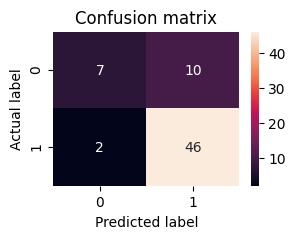

In [97]:
np.random.seed(42)
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
plt.title('Confusion matrix');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [98]:
print('ROC-AUC Logistic Regression test:', roc_auc_score(y_test, logit.predict_proba(test_)[:,1]))

ROC-AUC Logistic Regression test: 0.8958333333333334


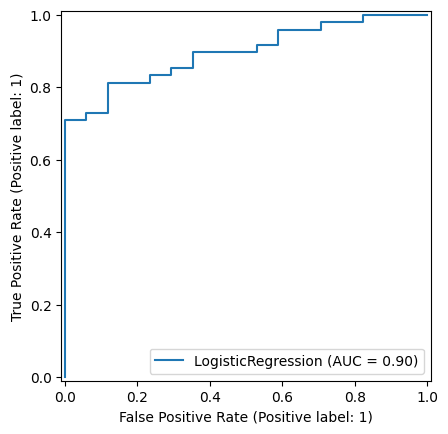

In [99]:
logit_disp = RocCurveDisplay.from_estimator(logit, test_, y_test)

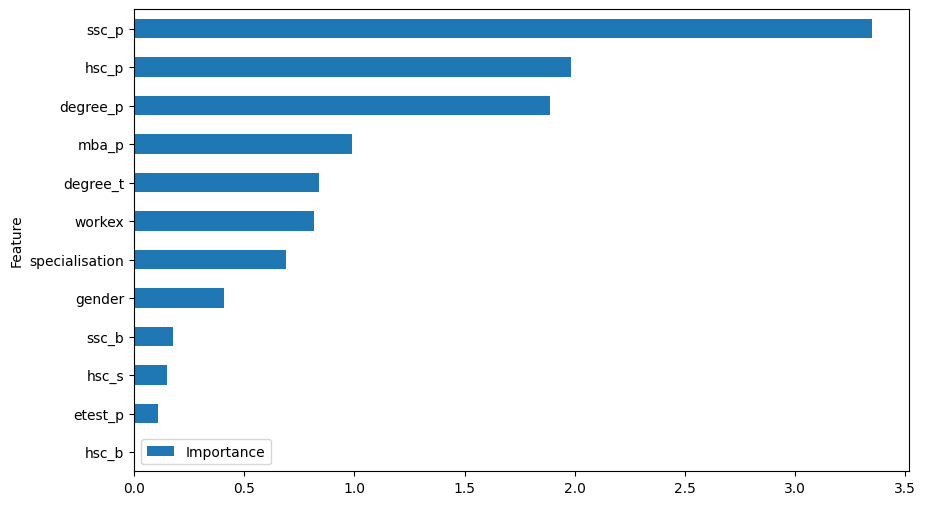

In [100]:
coefficients = logit.coef_[0]
feature_importance = pd.DataFrame({'Feature': train_.columns, 'Importance': np.abs(coefficients)});
feature_importance = feature_importance.sort_values('Importance', ascending=True);
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6));